### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

#### 1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from requests.auth import HTTPBasicAuth

In [2]:
with open("zomato.csv", errors = "ignore", encoding = "utf-8") as file: #errors = ignore so file become error free
    file_data = csv.DictReader(file, skipinitialspace = True)
    file_list = list(file_data)
    
zomato = pd.DataFrame(file_list) #Converting csv file to Dataframe

In [3]:
z = zomato[zomato["Country Code"] == "1"].copy() #Make a copy so changes will not refelect in original one

count_res_ncr = z[(z["City"] == "Faridabad") | (z["City"] == "Noida") | (z["City"] == "New Delhi") | 
            (z["City"] == "Ghaziabad") | (z["City"] == "Gurgaon")]["Restaurant ID"].count() 
#Finding total number of resturants In delhi ncr

count_res_roi = z["Restaurant ID"].count() - count_res_ncr
#Finding resturants in ret of india

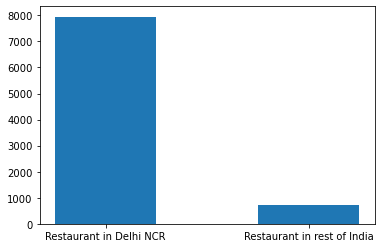

In [4]:
#plotting the graph
labels = ["Restaurant in Delhi NCR", "Restaurant in rest of India"] #labeling the graph
plt.bar(labels, [count_res_ncr, count_res_roi], width = .5)
plt.show()

#### 2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [5]:
z_ncr = z[(z["City"] == "Faridabad") | (z["City"] == "Noida") | (z["City"] == "New Delhi") | 
            (z["City"] == "Ghaziabad") | (z["City"] == "Gurgaon")].copy()

z_roi = z[(z["City"] != "Faridabad") & (z["City"] != "Noida") & (z["City"] != "New Delhi") & 
            (z["City"] != "Ghaziabad") & (z["City"] != "Gurgaon")].copy()

set_ncr = set()
set_roi = set()

for i in z_ncr["Cuisines"]:
    l = i.split(", ")
    for j in l:
        set_ncr.add(j)
        
for i in z_roi["Cuisines"]:
    l = i.split(", ")
    for j in l:
        set_roi.add(j)
        
print("Cuisines That are in not in Delhi NCR but present in rest of India")

diff =  set_roi - set_ncr
for i in diff:
    print(i)

Cuisines That are in not in Delhi NCR but present in rest of India
Cajun
German
Malwani
BBQ


In [6]:
import requests,json
header = {'Accept':'application/json','user-key':'d35451bc6dc04b3662194e3fce301ced'}
response = requests.get('https://api.zomato.com/v2.1/cities', params = {'q':'delhi'}, headers = header)

response = response.json()
city_id = response['location_suggestions'][0]['id']
response = requests.get('https://api.zomato.com/v2.1/cuisines', params = {'city_id':city_id}, headers=header)
response = response.json()

li = []
for i in range(len(response['cuisines'])):
    li.append(response['cuisines'][i]['cuisine']['cuisine_name'])

li = set(li)
l = diff.difference(li)
print('Cuisines which are in ncr through zomato api but not in rest in india by dataset are')
for ele in list(l):
    print(ele)

Cuisines which are in ncr through zomato api but not in rest in india by dataset are
German
Cajun


#### 3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [7]:
dict_ncr = {} #Dictionary of cuisines famous in Delhi-NCR
dict_roi = {} ##Dictionary of cuisines famous in Rest of india

for i in z_ncr["Cuisines"]:
    l = i.split(", ")
    for j in l:
        dict_ncr[j] = dict_ncr.get(j, 0) + 1
        
dict_ncr = {key: value for key, value in sorted(dict_ncr.items(), key=lambda item: item[1], reverse = True)[:10]}
#Sorting the dictionary on the basis of keys

for i in z_roi["Cuisines"]:
    l = i.split(", ")
    for j in l:
        dict_roi[j] = dict_roi.get(j, 0) + 1
        
dict_roi  = {key: value for key, value in sorted(dict_roi.items(), key=lambda item: item[1], reverse = True)[:10]}
#Sorting the dictionary on the basis of keys

print("10 famous Cuisines in Delhi NCR\n")

for i in dict_ncr:
    print(i, dict_ncr[i])

print("\n\n10 famous Cuisines in Rest of India\n")
for i in dict_roi:
    print(i, dict_roi[i])

10 famous Cuisines in Delhi NCR

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


10 famous Cuisines in Rest of India

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


#### 4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

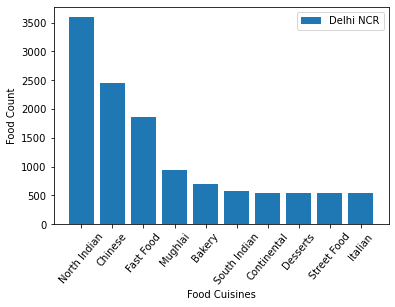

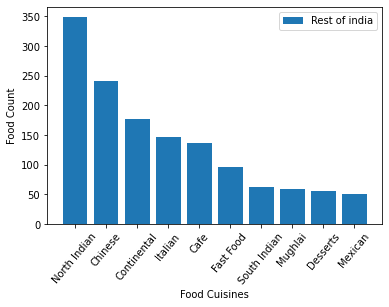

In [8]:
a_cuisines_ncr = [] #list of top cuisines in Delhi-NCR 
a_cuisines_roi = [] #list of top cuisines in Rest of india
a_count_ncr = [] #Count of cuisines in Delhi-NCR
a_count_roi = [] ##Count of cuisines in Rest of india

for i in dict_ncr:
    a_cuisines_ncr.append(i) 
    
for i in dict_roi:
    a_cuisines_roi.append(i)

    
for i in a_cuisines_ncr:
    for j in dict_ncr:
        if i == j:
            a_count_ncr.append(dict_ncr[j])
    
for i in a_cuisines_roi:
    for j in dict_roi:
        if i == j:
            a_count_roi.append(dict_roi[j])  
    
#Plotting the graph
plt.bar(a_cuisines_ncr, a_count_ncr)
plt.xticks(rotation = 50)
plt.legend(["Delhi NCR"])
plt.xlabel("Food Cuisines")
plt.ylabel("Food Count")
plt.show()

plt.bar(a_cuisines_roi, a_count_roi)
plt.xticks(rotation = 50)
plt.legend(["Rest of india"])
plt.xlabel("Food Cuisines")
plt.ylabel("Food Count")
plt.show()